# AI Workshop - Lab 2-1: Decision Trees and Neural Networks

In the first lab, we used a decision tree classifier to evaluate the quality of different imputation methods, but we didn't really discuss what decision trees are or how they work. In this lab, we will delve into the details of decision trees and explore how they can be used to make predictions with our energy and weather datasets.

In [1]:
# Install graphviz, which we will use later in the lab
!pip install -Uq graphviz

### Decision Trees

Decision trees are popular supervised learning methods used for classification and regression. The tree represents a series of simple decision rules that predict the target when the feature vector is passed through them. Decision trees are easy to understand, can be visualized nicely, require very little data preparation (e.g., we don't need to scale features), and the trained model can be explained easily to others post priori (as opposed to other *black box* methods that are difficult to communicate).

###### Example
Suppose you wanted to design a simple decision tree for whether (or not) you buy a used car. You might develop something like the following:

<img src="https://github.com/lyeskhalil/mlbootcamp/blob/master/img/decision-tree.gif?raw=1" width="500"/>

**YOUR TURN:** Let's say you're browsing Kijiji and come across a used car that: has been road tested, has high mileage, and is a recent year/model.
* According to your decision tree model, should you buy this car or not? ____________________________
* Will you buy any cars that haven't been road tested (if you follow your model)? ___________________________________

Obviously this tree may not be ideal, depending on the situation. For example, you could have a road tested car of a recent year with 2,000,000 km's on it and the model is telling you to buy! (But, you probably shouldn't)

### Energy and Weather Datasets

Just as in the first lab, we are going to use the energy and weather datasets to explore decision trees. To save time, we have prepared a cleaned version that we will use this afternoon. Let's load the data and take a look at the first few rows.

In [2]:
import pandas as pd

df = pd.read_csv('data/cleaned_energy_data.csv')
df

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,...,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,1,309,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,0,226,0.0,0.0,0.0,0,800,clear,sky is clear,01
3,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,7,58,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,1,21,0.0,0.0,0.0,0,800,clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178161,2018-12-31 23:00:00+01:00,290.0,0.0,6926.0,2166.0,163.0,108.0,1069.0,1686.0,6075.0,...,2,300,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178162,2018-12-31 23:00:00+01:00,290.0,0.0,6926.0,2166.0,163.0,108.0,1069.0,1686.0,6075.0,...,1,360,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178163,2018-12-31 23:00:00+01:00,290.0,0.0,6926.0,2166.0,163.0,108.0,1069.0,1686.0,6075.0,...,2,100,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178164,2018-12-31 23:00:00+01:00,290.0,0.0,6926.0,2166.0,163.0,108.0,1069.0,1686.0,6075.0,...,5,310,0.0,0.0,0.0,0,800,clear,sky is clear,01n


As we have seen already, we can use Pandas to conveniently summarize key aspects of the data. For example, we can use the `describe` method to get a quick statistical summary of the data:


In [ ]:
df.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,...,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
count,178166.000000,178166.000000,178166.000000,178166.000000,178166.000000,178166.000000,178166.000000,178166.000000,178166.000000,178166.000000,...,178166.000000,1.781660e+05,178166.000000,178166.000000,178166.000000,178166.000000,178166.000000,178166.000000,178166.000000,178166.000000
mean,383.013426,448.312798,5626.020240,4253.721451,298.162618,475.253949,972.904258,2606.154047,6263.661821,60.168927,...,291.097809,1.069337e+03,68.422118,2.470561,166.552322,0.075369,0.000380,0.004728,25.070288,759.853277
std,85.207098,354.336415,2204.099332,1960.704820,52.414459,792.536524,400.948849,1835.674943,838.605273,20.209970,...,8.611970,5.973483e+03,21.903982,2.096107,116.614600,0.398610,0.007292,0.222687,30.769293,108.719322
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,262.240000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000
25%,333.000000,0.000000,4127.000000,2526.000000,263.000000,0.000000,638.000000,1078.000000,5757.000000,53.000000,...,284.668000,1.013000e+03,53.000000,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,800.000000
50%,366.000000,509.000000,4971.000000,4470.000000,300.000000,67.000000,907.000000,2165.000000,6562.000000,57.000000,...,290.150000,1.018000e+03,72.000000,2.000000,177.000000,0.000000,0.000000,0.000000,20.000000,800.000000
75%,429.000000,757.000000,6434.000000,5835.000000,329.000000,615.000000,1251.000000,3757.000000,7025.000000,80.000000,...,297.150000,1.022000e+03,87.000000,4.000000,270.000000,0.000000,0.000000,0.000000,40.000000,801.000000
max,592.000000,999.000000,20034.000000,8359.000000,449.000000,4523.000000,2000.000000,9728.000000,7117.000000,106.000000,...,321.150000,1.008371e+06,100.000000,133.000000,360.000000,12.000000,2.315000,21.500000,100.000000,804.000000


##### Model Development

In the previous lab, we looked at predicting weather conditions based on energy demand. We found that there are too many types of condition for a simple model to predict accurately. This time, we'll look specifically at the presence or absence of clouds using the `clouds_all` column (which records the percentage cloud cover at the time of the observation).

Let's import sklearn's decision tree classifer and split the data (using techniques we covered in the first lab).

In [3]:
from sklearn.model_selection import train_test_split

target_data = df['clouds_all'] != 0
feature_data = df[['generation biomass', 'generation fossil brown coal/lignite',
                   'generation fossil gas',
                   'generation fossil hard coal', 'generation fossil oil',
                   'generation hydro pumped storage consumption',
                   'generation hydro run-of-river and poundage',
                   'generation hydro water reservoir',
                   'generation nuclear', 'generation other', 'generation other renewable',
                   'generation solar', 'generation waste',
                   'generation wind onshore']]

X_train, X_test, y_train, y_test = train_test_split(feature_data, target_data, test_size=0.3, random_state=0)

**YOUR TURN:**
* How many samples are in the training set? _______________________
* How many samples are in the test set? _______________________
* What percentage of the samples have clouds in the training set? _______________________

In [4]:
## Your code here
print(f'Training samples: {len(X_train)}')
print(f'Test samples: {len(X_test)}')
print(f'Percentage of samples with clouds in the training set: {y_train.mean()}')

Training samples: 124716
Test samples: 53450
Percentage of samples with clouds in the training set: 0.5380945508194618


##### Dealing with Missing Data: Imputation

Before we can fit our decision tree to our training data, we can conduct imputation to replace missing values in our dataset. Previously we did this manually so that we could follow the process, but now we'll use the handy `SimpleImputer` class from sklearn. This class allows us to replace missing values with a specified strategy (e.g., mean, median, most frequent).

In [5]:
from sklearn.impute import SimpleImputer
import numpy as np

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imp.fit(X_train)
X_train = imp.transform(X_train) # replace missing data using our imputer

So we've got our data prepared, let's fit a decision tree to our training data.

In [6]:
from sklearn.metrics import accuracy_score
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=10) # We'll set a max depth to prevent overfitting

clf.fit(X_train, y_train)

accuracy = accuracy_score(y_train, clf.predict(X_train))
print ("Accuracy: ", accuracy * 100, "%")

Accuracy:  62.785849449950284 %


In the above cell, we defined a Decision Tree classifier and fit it to our training set. When we then used it to predict training set values, the resulting accuracy was ~63%

**YOUR TURN:**
* Since we are both training and predicting on our training set, why didn't the decision tree achieve 100% accuracy?
* What is the performance of this model on the test set?


In [7]:
## Your code here
##
##
##

##### Feature Importances

One thing we can do is take a look at the relative feature importances of the trained decision tree classifier. This will give us an idea of what the model thinks is more/less important for properly predicting the target.

Let's look at the feature importances for a model on the training data:

In [8]:
for feature, importance in zip(feature_data.columns, clf.feature_importances_):
    print(f'{feature:<43} {importance:0.2f}')

generation biomass                          0.10
generation fossil brown coal/lignite        0.05
generation fossil gas                       0.05
generation fossil hard coal                 0.06
generation fossil oil                       0.08
generation hydro pumped storage consumption 0.01
generation hydro run-of-river and poundage  0.11
generation hydro water reservoir            0.04
generation nuclear                          0.16
generation other                            0.03
generation other renewable                  0.04
generation solar                            0.10
generation waste                            0.07
generation wind onshore                     0.09


As we can see, the model places a higher importance on onshore nuclear generation than other features, although the importance is broadly spread across all features.

#### Visualizing the Tree

One useful thing we can do is actually visualize our decision tree model! We can use the [graphViz](https://www.graphviz.org/) library to accomplish this:

In [9]:
from sklearn.tree import export_graphviz
import graphviz # Package containing visualization tools

export_graphviz(clf, out_file="mytree.dot", feature_names=feature_data.columns) # export the tree to .dot file
with open("mytree.dot") as f: # read the file back in
    dot_graph = f.read()
graphviz.Source(dot_graph) # display the tree

**YOUR TURN:** Explore the decision tree and answer the following:
* What feature does the root node split on?
* What is the depth of the decision tree (i.e., the length of the longest path from root to leaf)?
* Do you think this decision tree is prone to overfitting? Why/why not?

To reduce the degree to which this tree is overfit to the training data, we can force the tree to be of some *maximum depth*. This ensures the tree won't be able to just keep generating new layers to properly classify every sample in the training stage (and, thus, presumably generalize better to the test set).

Let's try limiting the max depth to 2 and visualizing the resulting tree.

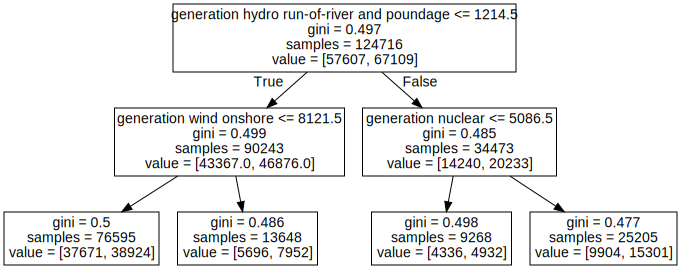

In [10]:
clf = tree.DecisionTreeClassifier(max_depth = 2)

clf.fit(X_train, y_train)

export_graphviz(clf, out_file="mytree.dot", feature_names=feature_data.columns)
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Much simpler!

There are many hyper-parameters that can be tuned to change how the model performs. Some common parameters that are modified include:
1. Max Tree Depth: How "tall" do you want your tree to be
2. Minimum Samples Per Leaf: This parameter defines the minimum number of training datapoints that fall into a given leaf node in order for that node to be created
3. Minimum Samples to Split: This parameter controls the minimum number of samples required to create a decision split

To decide the values of each of the parameters, we can use Grid Search combined with cross validation. In Grid Search, we first decide what potential values we want each hyperparameter will take. Then we find every possible combination of parameters and run cross validation on each combination to estimate the performance of that hyperparameter combination.

Luckily, `sklearn` has a nice implementation of Grid Search that runs this algorithm for us. Lets see a demo below:

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

clf = tree.DecisionTreeClassifier() # First we define our model without passing in parameters
hyperparameter_search = { # Then we decide the possible parameter combinations
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 5, 8, 11],
    'min_samples_leaf': [2, 5, 8, 11]
} # Since we have 3 parameters with 2 possible values, grid search will test 3^3 combinations
evaluation_metric = make_scorer(accuracy_score, # GridSearchCV requires us to wrap our metric function in a "scorer"
                                greater_is_better = True)

grid_search_cv = GridSearchCV(estimator = clf,
                              param_grid = hyperparameter_search,
                              scoring = evaluation_metric,
                              n_jobs = -1, # Use all available cores
                              cv = 5) # Set up search algorithm
grid_search_cv.fit(X_train, y_train) # Run the search. NOTE: This may take a while

print("Best Parameters: ", grid_search_cv.best_params_) # Print the parameters
print(f'Best Accuracy: {grid_search_cv.best_score_ * 100:0.2f}%') # Print the accuracy of the best model

clf = grid_search_cv.best_estimator_ # Get the best model from the GridSearch
accuracy = accuracy_score(y_test, clf.predict(imp.transform(X_test)))
print(f'Accuracy on test set: {accuracy * 100:0.2f}%')

Fitting 5 folds for each of 64 candidates, totalling 320 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters:  {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best CV Accuracy:  56.20610019709596 %
Testing Accuracy:  56.660430308699716 %


In the cell above, we tested our two values per hyperparameter and ran grid search to find the best combination from the space we defined. As you may have noticed, the number of combinations tested by Grid Search exponentially increases as you test more values and tune more hyperparameters. This means that performing a grid search is often a task that takes a long period of time and is often note used for more complex models like neural networks.

# Neural Networks with Keras

Let's move on to making predictions on our data using neural networks. We will use the Keras library to build a simple neural network and evaluate its performance on the test set.

This time, we will use our data for a *regression* task instead of a classification task. We will predict the amount of energy consumed based on the weather conditions (perhaps more in line with what you were expecting all along!) We will use a simple feedforward neural network with one hidden layer.

## Data Preparation

Let's prepare our X and y data for this new task. We will predict the total energy consumed based on the weather conditions.

In [14]:
target_data = df['total load actual']

feature_data = df[['city_name', 'temp', 'temp_min', 'temp_max', 'pressure',
                   'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h',
                   'clouds_all', 'weather_main']]

# One-hot encode city_name, weather_main
feature_data = pd.get_dummies(feature_data, columns=['city_name', 'weather_main'])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(feature_data, target_data, test_size=0.3, random_state=0)

In [16]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imp.fit(X_train)
X_train = imp.transform(X_train) # replace missing data using our imputer
X_test = imp.transform(X_test)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Let's check our data to confirm it's what we expect.

In [18]:
pd.DataFrame(X_train, columns=feature_data.columns)

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,...,weather_main_drizzle,weather_main_dust,weather_main_fog,weather_main_haze,weather_main_mist,weather_main_rain,weather_main_smoke,weather_main_snow,weather_main_squall,weather_main_thunderstorm
0,-0.364888,-0.276996,-0.459588,-0.007837,0.347035,-0.708875,1.144799,-0.189346,-0.047736,-0.02217,...,-0.098898,-0.044093,-0.118429,-0.049023,-0.14943,-0.328552,-0.013283,-0.039061,0.0,-0.076679
1,-2.124253,-2.035078,-2.082888,-0.010060,0.940041,-0.708875,1.401884,-0.189346,-0.047736,-0.02217,...,-0.098898,-0.044093,-0.118429,-0.049023,-0.14943,-0.328552,-0.013283,-0.039061,0.0,-0.076679
2,1.574894,1.104354,2.323213,-0.009376,-0.838977,-1.192394,-1.254670,-0.189346,-0.047736,-0.02217,...,-0.098898,-0.044093,-0.118429,-0.049023,-0.14943,-0.328552,-0.013283,-0.039061,0.0,-0.076679
3,-0.901244,-0.747997,-1.010430,-0.008692,-0.245971,-0.708875,0.219289,-0.189346,-0.047736,-0.02217,...,-0.098898,-0.044093,-0.118429,-0.049023,-0.14943,-0.328552,-0.013283,-0.039061,0.0,-0.076679
4,-1.429963,-1.407191,-1.387188,-0.007495,1.122505,-0.708875,-1.151835,-0.189346,-0.047736,-0.02217,...,-0.098898,-0.044093,-0.118429,-0.049023,-0.14943,-0.328552,-0.013283,-0.039061,0.0,-0.076679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124711,-0.247929,-0.151418,-0.343638,-0.009718,1.122505,-0.225356,0.904852,0.566079,-0.047736,-0.02217,...,-0.098898,-0.044093,-0.118429,-0.049023,-0.14943,3.043657,-0.013283,-0.039061,0.0,-0.076679
124712,-1.182358,-1.156037,-1.155288,-0.006640,0.575115,0.258163,0.630627,-0.189346,-0.047736,-0.02217,...,-0.098898,-0.044093,-0.118429,-0.049023,-0.14943,-0.328552,-0.013283,-0.039061,0.0,-0.076679
124713,0.809682,0.978777,0.583963,-0.009547,-0.565282,-0.708875,-1.168974,-0.189346,-0.047736,-0.02217,...,-0.098898,-0.044093,-0.118429,-0.049023,-0.14943,-0.328552,-0.013283,-0.039061,0.0,-0.076679
124714,-0.683415,-0.528150,-0.807438,-0.010574,0.848810,0.741682,0.544931,0.566079,-0.047736,-0.02217,...,-0.098898,-0.044093,-0.118429,-0.049023,-0.14943,3.043657,-0.013283,-0.039061,0.0,-0.076679


In [19]:
y_train

,total load actual
132952,29365.0
93470,22151.0
58432,29097.0
8805,25526.0
91972,26114.0
...,...
152315,29756.0
176963,24115.0
117952,32949.0
173685,27464.0


Looks good - we have our X and y data prepared for the regression task. Now we can build our neural network model!

## Building a Neural Network with Keras

Keras is a high-level neural networks API, written in Python and capable of running TensorFlow code. We will use Keras to build a simple feedforward neural network with one hidden layer. We will use the `Sequential` model from Keras to build our network.

Let's start by importing the necessary modules from Keras, and recording some of the data shapes (specifically, the number of features in our input data).

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Input

input_shape = X_train.shape[1]
output_shape = 1 # We are predicting a single value

Now we can build our model. We will use the `Sequential` model from Keras to build a simple feedforward neural network with one hidden layer. We will use the `Dense` class to define the layers in our network, which are fully connected layers.

Let's start by building a simple model with 1 hidden layer and 10 neurons. We need to make sure that the input shape of the first layer matches the number of features in our input data.

In [21]:
model = Sequential(
    [
        Input(shape=(input_shape,)), # Defining the input layer
        Dense(10), # <--- Hidden layer with 10 neurons
        Activation('relu'), # Simple ReLU activation
        Dense(output_shape) # One output neuron
    ]
)

model.compile(optimizer='sgd', loss='mean_absolute_error') # Compile the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

We have built a simple neural network with 1 hidden layer and 10 neurons. The model has 301 parameters (weights) that need to be learned.

We defined our network to be trained using Stochastic Gradient Descent, the most basic optimization algorithm. We also defined the loss function to be the mean absolute error, which is commonly used for regression tasks.

Now we are ready to train our model! We will use the `fit` method to train the model on our training data.

In [23]:
model.fit(
    X_train, y_train, # Training data
    epochs=5, # Number of epochs to train for
    batch_size=128, # Number of samples per gradient update
    validation_data=(X_test, y_test) # Validation data
)

Epoch 1/5
975/975 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 3585.3733 - val_loss: 3583.8792
Epoch 2/5
975/975 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 3577.2251 - val_loss: 3588.6047
Epoch 3/5
975/975 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3578.2954 - val_loss: 3581.9358
Epoch 4/5
975/975 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 3565.8821 - val_loss: 3580.6614
Epoch 5/5
975/975 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 3573.9827 - val_loss: 3580.4519


As a final check, let's calculate both the Mean Absolute Error and the Mean Absolute Percentage Error on the testing set. As it sounds, the MAPE gives us the average percentage that the predictions differ from the true value, which is helpful for understanding the level of accuracy.

In [27]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

y_pred = model.predict(X_test)
print(f'MAE:  {mean_absolute_error(y_test, y_pred):.02f}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)*100:.02f}%')

1671/1671 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
MAE:  3580.45
MAPE: 12.79%
